# Implementing a Decision Tree Classifier

## Agenda

- Create and visualize a Decision Tree Classifier
- Utilize GridsearchCV to find the best hyperparameters of the model
- Discuss the role of Cross validation in the process

In [2]:
# Load libraries
import pandas as pd
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation

from matplotlib import pyplot as plt


In [3]:
link ='https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-062220-lectures/master/Mod_3/decision_trees/cleaned_titanic.csv'

In [4]:
# Read in data and split data to be used in the models
titanic = pd.read_csv(link, index_col='PassengerId')

# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [5]:
titanic

Survived  Pclass   Age  SibSp  Parch     Fare  youngin  male  Q  \
PassengerId                                                                    
1                   0       3  22.0      1      0   7.2500    False     1  0   
2                   1       1  38.0      1      0  71.2833    False     0  0   
3                   1       3  26.0      0      0   7.9250    False     0  0   
4                   1       1  35.0      1      0  53.1000    False     0  0   
5                   0       3  35.0      0      0   8.0500    False     1  0   
...               ...     ...   ...    ...    ...      ...      ...   ... ..   
887                 0       2  27.0      0      0  13.0000    False     1  0   
888                 1       1  19.0      0      0  30.0000    False     0  0   
889                 0       3  24.0      1      2  23.4500    False     0  0   
890                 1       1  26.0      0      0  30.0000    False     1  0   
891                 0       3  32.0      0      0   7.7500    False     1  1   

             S  
PassengerId     
1            1  
2            0  
3            1  
4            1  
5            1  
...         ..  
887          1  
888          1  
889          1  
890          0  
891          0  

[889 rows x 10 columns]

In [6]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()



Let's look at the default settings for this model

In [8]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.9841897233201581
Testing F1 Score: 0.736842105263158


## Visualizing the decision tree

In [10]:
# !pip install pydotplus
#!pip install --upgrade scikit-learn==0.20.3
#!sudo apt-get install graphviz

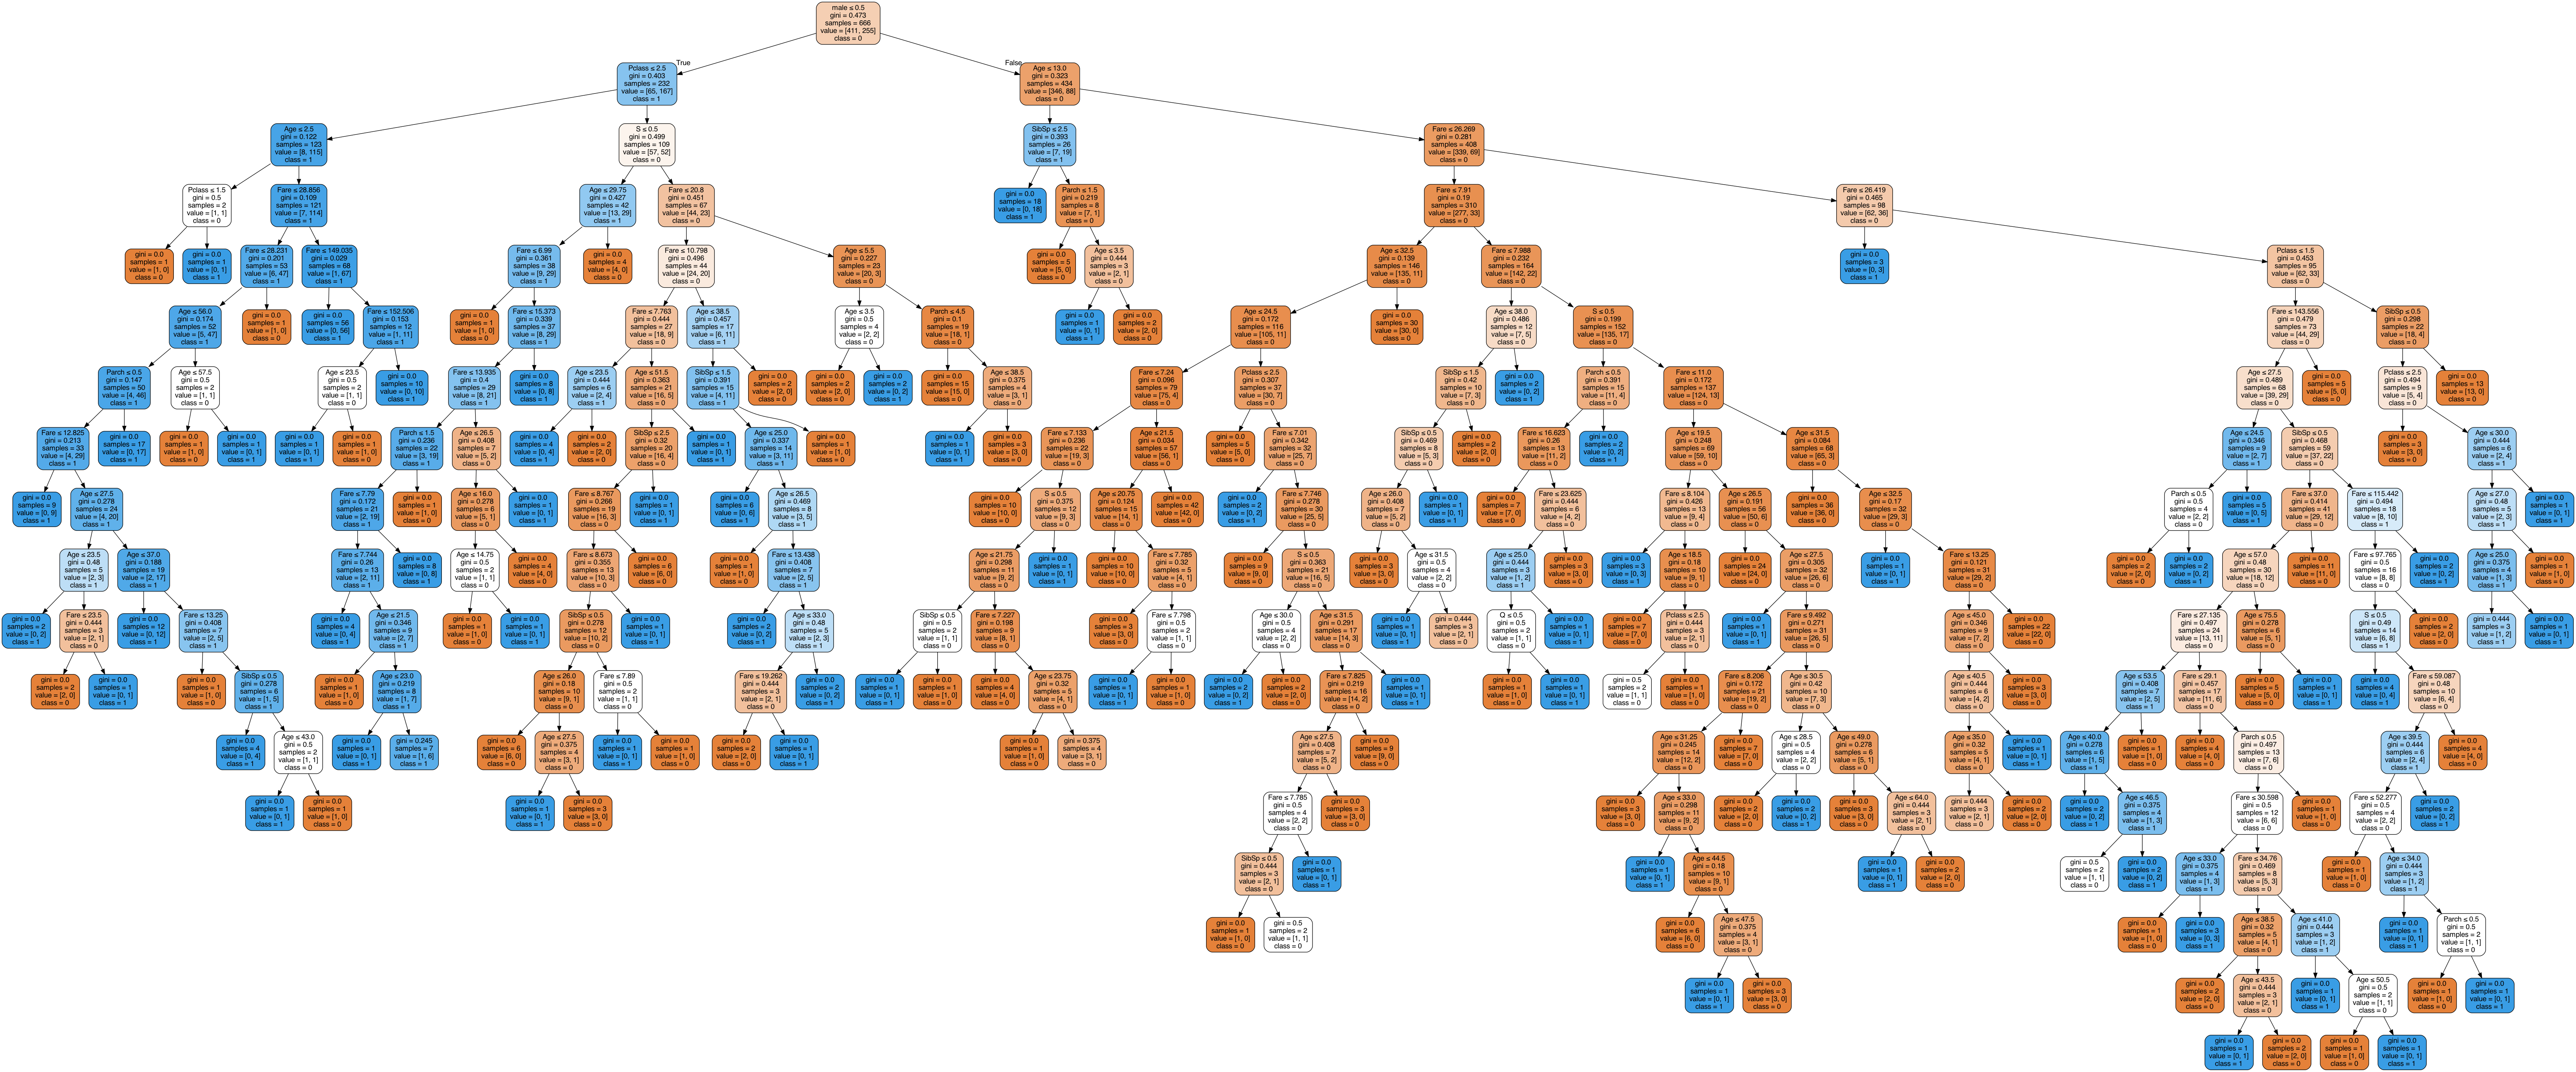

In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Let's create another tree but make it really short by setting max_depth=3

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.7385321100917431
Testing F1 Score: 0.761904761904762


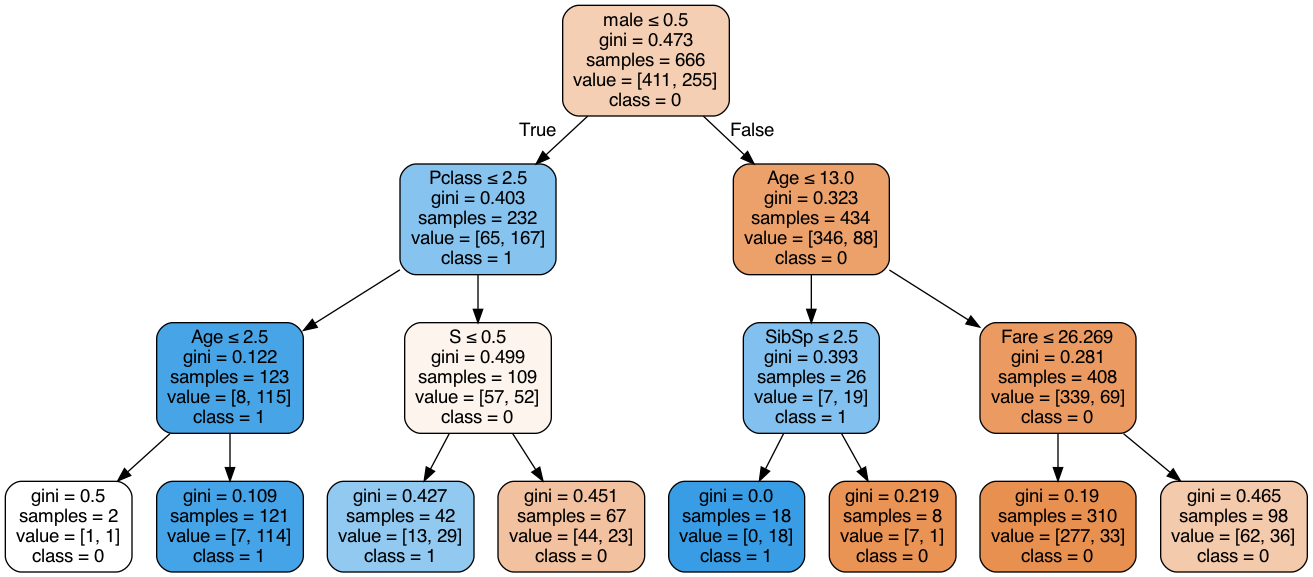

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_depth3.png')
Image(graph.create_png())

**Using this visualization and the scoring metrics, write a sentence comparing the model with no restrictions to the model with `max_depth=3`**

answer:

## Tuning Hyperparameters

As you can see above, limiting the tree depth greatly improved our test performance and prevented our model from over fitting. 

- Is a max-depth of 3 the best parameter? 

- How would we figure this out?

In [18]:
# Import Grid search
from sklearn.model_selection import GridSearchCV


## Cross-Validation


Earlier we mentioned some of the potential issues with the train/test split method. In order to avoid this, we can perform something called **cross validation**. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.


<img src='./images/tts_cv.png' /> 

In [19]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Create Parameter Candidates


Before looking for which combination of parameter values produces the most accurate model, we must specify the different candidate values we want to try. In the code below we have a number of candidate parameter values, including different values for min_samples_leaf and max_depth. The grid search will try all combinations of parameter values and select the set of parameters which provides the most accurate model.

In [20]:
# creating our parameters to test
# create a parameters dictionary that will loop over a range of 1-20 for the 'max_depth' parameter
parameters={'max_depth': range(1,21,1)}


In [21]:
list(range(1, 21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [22]:
parameters

{'max_depth': range(1, 21)}

In [30]:
#create our estimaor
dtc = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dtc, parameters, cv=10, scoring='f1', verbose=1, n_jobs=-1)

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 21)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=1)

In [31]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.7208046646241794
{'max_depth': 4}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


**Now let's take that best model and see how it does on our testing data**

In [32]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.7702702702702703


## Let's vizualize our best Decision Tree

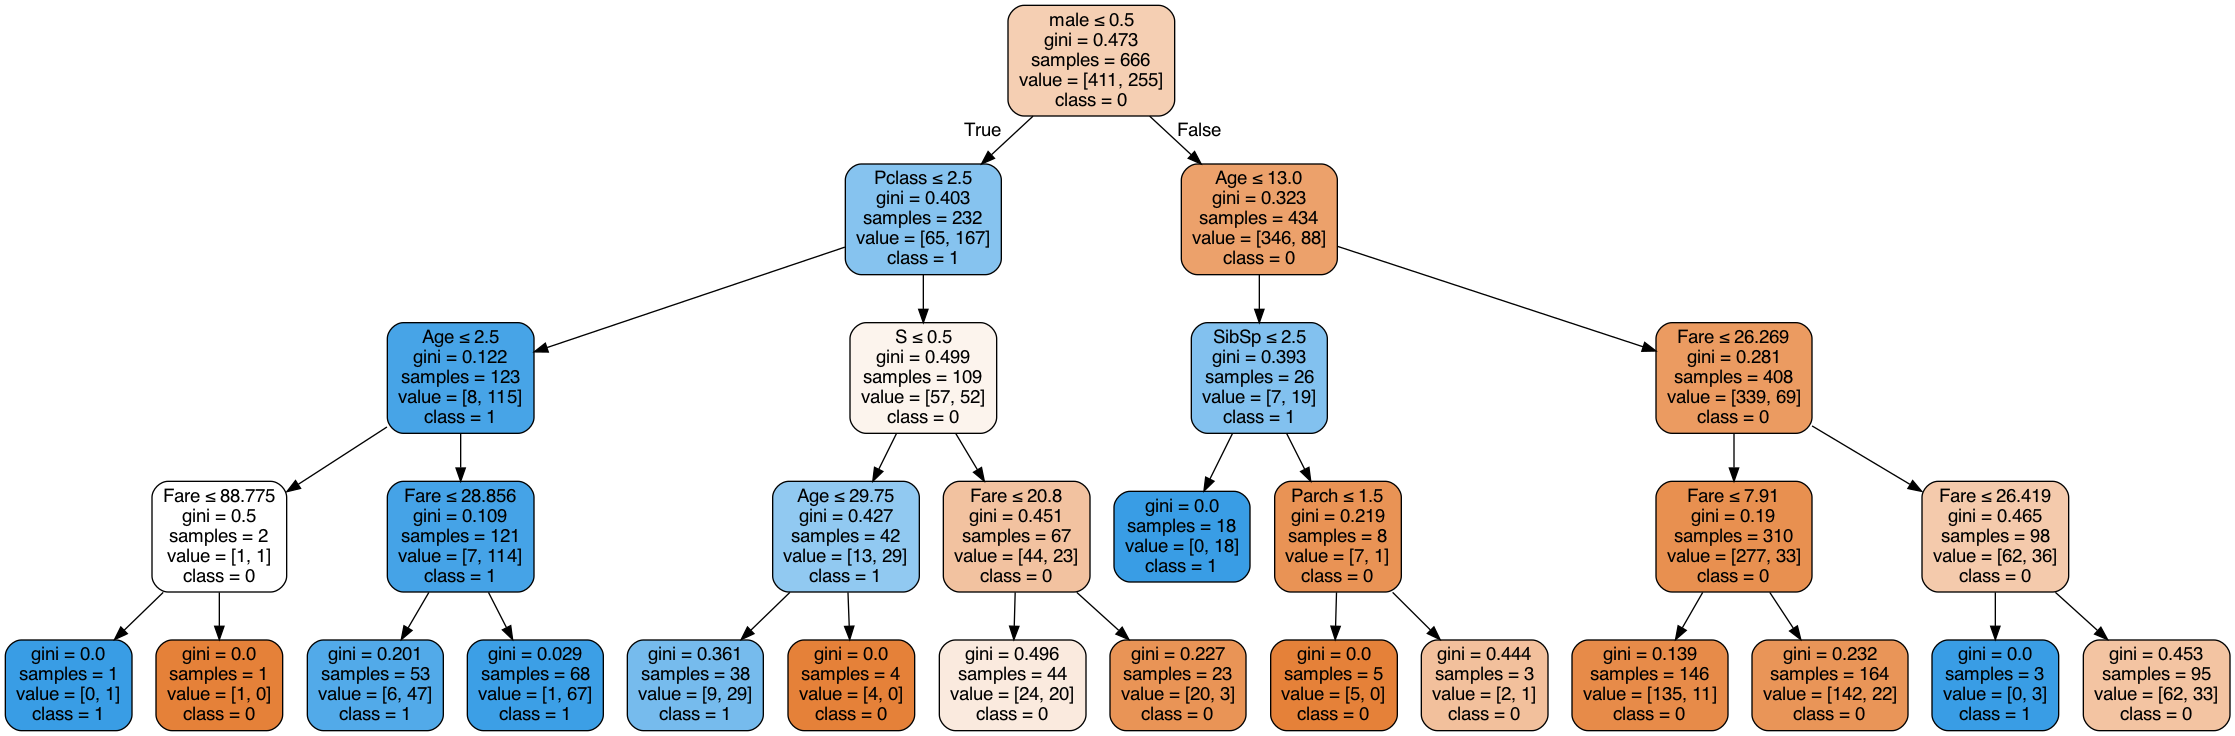

In [33]:
dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_gs.png')
Image(graph.create_png())

## Working with different scorers

The grid search object allows you to score the different models using different scoring metrics. Look into the documentation and see which parameters allow you to do this.  

In [34]:
GridSearchCV()

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

The scorers can be either be one of the predefined metric strings or a scorer callable, like the one returned by make_scorer

In [ ]:
def custom_scorer():
    

In [35]:

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
gs.fit(X, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 21)}, pre_dispatch='2*n_jobs',
       refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
       verbose=0)

In [36]:
results = gs.cv_results_

In [37]:
results

{'mean_fit_time': array([0.00882668, 0.00528846, 0.00456529, 0.0046761 , 0.00482593,
        0.00503354, 0.00526214, 0.00673509, 0.00569916, 0.0053484 ,
        0.00470724, 0.00492234, 0.00776424, 0.00611115, 0.0060472 ,
        0.00639811, 0.00584641, 0.00530405, 0.00489473, 0.00520768]),
 'std_fit_time': array([0.00157559, 0.00051089, 0.00017954, 0.00016767, 0.00047116,
        0.0005876 , 0.0008824 , 0.00143452, 0.00081528, 0.0007221 ,
        0.00055061, 0.00070704, 0.00346794, 0.00055728, 0.00127561,
        0.00147431, 0.00053012, 0.00060763, 0.00021372, 0.00038861]),
 'mean_score_time': array([0.00953841, 0.00575151, 0.00521469, 0.00530138, 0.00453701,
        0.00473781, 0.00440416, 0.00538421, 0.00471134, 0.00476117,
        0.00439196, 0.00440283, 0.00542164, 0.00555701, 0.00562439,
        0.00616021, 0.0060854 , 0.00475945, 0.00399427, 0.00399423]),
 'std_score_time': array([0.00409942, 0.00086669, 0.00060627, 0.00074318, 0.00018834,
        0.0006094 , 0.00036911, 0.000602

In [36]:
results['param_max_depth']

masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                   17, 18, 19, 20],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object)

## How the depth of the trees affects the  the bias versus variance tradeoff.

Below is a graph of the results across different `max_depth` values. 

In [38]:
import numpy as np

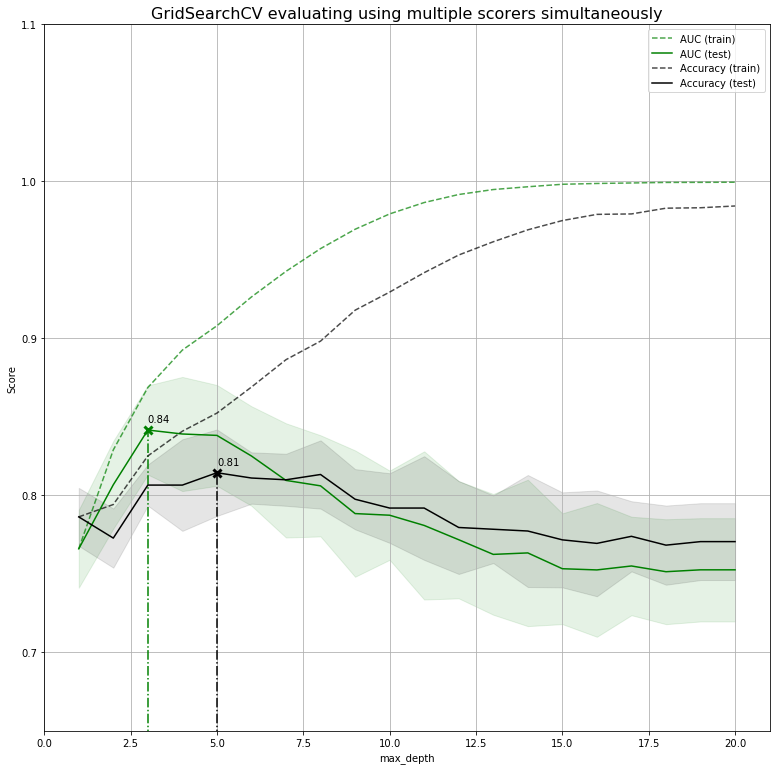

In [39]:
from matplotlib import pyplot as plt



plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("max_depth")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 21)
ax.set_ylim(0.65, 1.1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show();

What happens to our model as we allow it to grow to deeper? 

___

## Your turn

Using the code examples from above, generate your own gridsearch model that tunes at least 3 different parameters for the decision tree. 


## Step 1:

Instantiate your classifier and set any parameters you want to be consistent across all model fittings

In [41]:
#create our estimaor
decision_tree = DecisionTreeClassifier(random_state=1)


## Step 2:

Create the grid of parameters you want to test.

In [63]:
# creating our parameters to test
param_dict={
    'max_depth': range(1,10,1),
    'min_samples_leaf': range(1,6,1),
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 17,20,15],
    'min_sample_split': range(1,7, 1)
}


## Step 3 :
    
Create your GridSearch object and fit it

In [64]:

#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree=GridSearchCV(decision_tree,
                       param_grid = param_dict,
                       cv=10, 
                       scoring='f1',
                      verbose = 10)



In [65]:
#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train);

Fitting 10 folds for each of 540 candidates, totalling 5400 fits
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.75, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.693877551020408, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.6153846153846154, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.7083333333333333, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, score=0.693877551020408, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, score=0.6153846153846154, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, score=0.7083333333333333, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, score=0.608695652173913, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, score=0.7499999999999999, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=1

[CV]  max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2, score=0.5555555555555556, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2, score=0.7000000000000001, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2, score=0.5555555555555556, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2, score=0.5499999999999999, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2, score=0.5405405405405406, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=1, max_features=Non

[CV]  max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, score=0.5499999999999999, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, score=0.5405405405405406, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, score=0.6666666666666666, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.7272727272727274, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.6666666666666667, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=1, max_features=Non

[CV]  max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.7000000000000001, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.5555555555555556, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.5499999999999999, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.5405405405405406, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=1, max_features=Non

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.28571428571428575, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.5, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.6086956521739131, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.5573770491803278, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.6428571428571428, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=1, max_featur

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.411764705882353, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.2666666666666667, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.28571428571428575, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.33333333333333337, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.375, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=sqrt, max_leaf_

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, score=0.375, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, score=0.33333333333333337, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, score=0.3225806451612903, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.375, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.4444444444444444, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=15, min

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=5, score=0.3225806451612903, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.6071428571428571, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.5666666666666668, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.5999999999999999, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.6206896551724138, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=1

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.6086956521739131, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.5573770491803278, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.6428571428571428, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1, score=0.375, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1, score=0.4444444444444444, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, 

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.28571428571428575, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.33333333333333337, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.375, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.33333333333333337, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.3225806451612903, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_lea

[CV] max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1, score=0.375, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1, score=0.4444444444444444, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1, score=0.3888888888888889, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1, score=0.411764705882353, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1, score=0.2666666666666667, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nod

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.33333333333333337, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.3225806451612903, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.7272727272727274, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.6666666666666667, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.6153846153846154, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=2, m

[CV]  max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.5405405405405406, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=17, min_samples_leaf=1, score=0.8, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=17, min_samples_leaf=1, score=0.7317073170731707, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=17, min_samples_leaf=1, score=0.6530612244897959, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_le

[CV]  max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, score=0.6190476190476191, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, score=0.6666666666666665, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, score=0.7272727272727272, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, score=0.8, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, score=0.7317073170731707, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=2, max_features=None, max_leaf_nod

[CV]  max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2, score=0.7317073170731707, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2, score=0.6530612244897959, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2, score=0.7755102040816326, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2, score=0.7142857142857143, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2, score=0.7906976744186047, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=2, max_features=Non

[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, score=0.2666666666666667, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, score=0.28571428571428575, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, score=0.33333333333333337, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, score=0.375, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, score=0.33333333333333337, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=2, max_fe

[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.6774193548387097, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.6779661016949152, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.6666666666666666, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.6037735849056605, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.42424242424242425, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=2, max_features=sq

[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, score=0.7333333333333334, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.7536231884057971, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.7118644067796609, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.6764705882352942, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.6774193548387097, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqr

[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.6774193548387097, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.6779661016949152, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.6545454545454547, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.42424242424242425, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=2, max_features=sq

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, score=0.375, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, score=0.33333333333333337, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, score=0.3225806451612903, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.375, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.4444444444444444, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, ma

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.7536231884057971, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.7118644067796609, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.6764705882352942, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.6774193548387097, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.6779661016949152, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.6779661016949152, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.6666666666666666, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.6545454545454547, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.42424242424242425, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.5142857142857143, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=2, max_features=lo

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, score=0.7333333333333334, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.7536231884057971, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.7118644067796609, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6764705882352942, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6774193548387097, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=2, max_features=log

[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.761904761904762, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.6530612244897959, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7755102040816326, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7906976744186047, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=

[CV]  max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7916666666666666, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7000000000000001, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6363636363636364, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=3, max_features=Non

[CV]  max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7000000000000001, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.6363636363636364, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=3, max_features=Non

[CV]  max_depth=3, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.6363636363636364, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.6818181818181819, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, score=0.7692307692307693, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=3, max_featur

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, score=0.5365853658536586, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, score=0.7843137254901961, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.7272727272727274, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.7659574468085107, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=3, max_fe

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.7659574468085107, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.5641025641025641, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.5641025641025641, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.5, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nod

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.7142857142857143, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.5106382978723404, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.6808510638297872, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.5909090909090909, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.6666666666666666, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=3, max_features=sqr

[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.7111111111111111, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.7692307692307693, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.7234042553191489, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.6666666666666667, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.7111111111111111, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth

[CV]  max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.5, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.6666666666666665, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.5106382978723404, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.6808510638297872, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.6222222222222222, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=3, max_features=log2, max_leaf_nod

[CV]  max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, score=0.6976744186046512, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, score=0.75, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, score=0.7916666666666666, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, score=0.5909090909090908, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, score=0.5641025641025641, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_no

[CV]  max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3, score=0.75, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3, score=0.7916666666666666, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3, score=0.5909090909090908, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3, score=0.5641025641025641, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3, score=0.5, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=15, min_sam

[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, score=0.6808510638297872, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, score=0.7826086956521738, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, score=0.7142857142857143, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, score=0.7906976744186047, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, score=0.7142857142857143, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth

[CV]  max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.7272727272727274, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.6938775510204083, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.6363636363636364, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=Non

[CV]  max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.7272727272727274, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.6938775510204083, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.6363636363636364, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=4, max_features=Non

[CV]  max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6938775510204083, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6363636363636364, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.7916666666666667, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=4, max_features=Non

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.6956521739130435, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.5818181818181818, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.41025641025641024, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.5853658536585366, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.7333333333333334, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_dept

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3, score=0.7083333333333334, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3, score=0.6521739130434783, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3, score=0.7916666666666667, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.6363636363636364, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqr

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.7659574468085107, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.6363636363636364, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.7234042553191489, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.5238095238095238, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.7234042553191489, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqr

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.5238095238095238, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.65, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.6666666666666665, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.6909090909090909, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=4, max_features=sqrt, max_leaf_no

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.6956521739130435, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.5818181818181818, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.5238095238095238, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.8000000000000002, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.7333333333333334, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.7111111111111111, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.7755102040816326, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.5238095238095238, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.6, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nod

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.7755102040816326, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.5238095238095238, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nod

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6909090909090909, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.7083333333333334, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6521739130434783, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=4, max_features=log

[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7272727272727274, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.6415094339622641, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7916666666666666, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7500000000000001, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7727272727272727, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth

[CV]  max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7826086956521738, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7555555555555555, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7083333333333334, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7346938775510204, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6521739130434783, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=5, max_features=Non

[CV]  max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7083333333333334, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7499999999999999, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.6521739130434783, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.6818181818181819, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7916666666666667, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=Non

[CV]  max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.6222222222222222, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.7083333333333334, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.6521739130434783, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.6511627906976745, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.7755102040816326, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=5, max_features=s

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, score=0.8000000000000002, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.7659574468085107, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.5882352941176471, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.7999999999999999, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_n

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.816326530612245, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.8, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.7111111111111111, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.5882352941176471, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.7555555555555555, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_node

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.5882352941176471, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.7999999999999999, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.6976744186046512, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.6938775510204083, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1, score=0.6545454545454547, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=sqr

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.6785714285714285, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.7755102040816326, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.721311475409836, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.8085106382978723, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, score=0.6976744186046512, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1, score=0.5882352941176471, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1, score=0.7999999999999999, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1, score=0.7142857142857143, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1, score=0.7083333333333334, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1, score=0.6545454545454547, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, score=0.7111111111111111, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, score=0.5882352941176471, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, score=0.7555555555555555, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, score=0.7142857142857143, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, score=0.7083333333333334, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.7234042553191491, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6956521739130435, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.816326530612245, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1, score=0.7843137254901961, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1, score=0.7916666666666666, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=5, max_features=log2

[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.7555555555555555, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.7826086956521738, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.7083333333333334, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.7083333333333334, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.6818181818181819, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth

[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7499999999999999, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.6521739130434783, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.6818181818181819, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7916666666666667, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=1, score=0.7692307692307693, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=6, ma

[CV]  max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7916666666666666, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7083333333333334, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6521739130434783, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6511627906976745, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=6, max_features=Non

[CV]  max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.6666666666666665, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.6818181818181819, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.7916666666666667, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7692307692307693, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7272727272727274, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=6, max_features=Non

[CV]  max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.7272727272727274, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.6363636363636364, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.6938775510204083, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.6808510638297872, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.6511627906976745, total=   0.0s
[CV] max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=Non

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.5777777777777778, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.6521739130434783, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.7755102040816326, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.7843137254901961, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.6976744186046512, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3, score=0.6046511627906976, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3, score=0.7916666666666667, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.8235294117647058, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.8, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.6153846153846154, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nod

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.7111111111111111, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.6666666666666666, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.6785714285714285, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.7083333333333334, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, score=0.5, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nod

[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.7083333333333334, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.6046511627906976, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=3, score=0.8000000000000002, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.8518518518518519, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.7843137254901961, total=   0.0s
[CV] max_depth=6, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=sqr

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, score=0.6521739130434783, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, score=0.7755102040816326, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.7843137254901961, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.6976744186046512, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.5384615384615384, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=3, score=0.7916666666666667, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.8235294117647058, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.8, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.6153846153846154, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.7391304347826088, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nod

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.7234042553191489, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.6153846153846154, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.7111111111111111, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.7346938775510203, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, score=0.6808510638297872, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log

[CV]  max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, score=0.7500000000000001, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, score=0.6808510638297872, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, score=0.6785714285714285, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, score=0.7083333333333334, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, score=0.6046511627906976, total=   0.0s
[CV] max_depth=6, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=6, max_features=log

[CV]  max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, score=0.7272727272727274, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, score=0.6666666666666666, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, score=0.5714285714285715, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, score=0.7450980392156863, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, score=0.761904761904762, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=

[CV]  max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.6521739130434783, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.6511627906976745, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, score=0.7755102040816326, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=4, score=0.7692307692307693, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=4, score=0.6956521739130435, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=Non

[CV]  max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.6818181818181819, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, score=0.7916666666666667, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.7692307692307693, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.6956521739130435, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.6792452830188679, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=Non

[CV]  max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.7755102040816326, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.7692307692307693, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.6956521739130435, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.7058823529411765, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4, score=0.7916666666666666, total=   0.0s
[CV] max_depth=7, max_features=None, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=Non

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.7234042553191491, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.6785714285714285, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.6666666666666667, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.6808510638297872, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, score=0.8333333333333333, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.7547169811320754, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.6037735849056604, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.7916666666666666, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.7346938775510203, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4, score=0.6808510638297872, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqr

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.6037735849056604, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.7555555555555555, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.7346938775510203, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.6808510638297872, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.6785714285714285, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqr

[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.6785714285714285, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.7083333333333334, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.6046511627906976, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.8000000000000002, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=5, score=0.8518518518518519, total=   0.0s
[CV] max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=7, max_features=sqr

[CV]  max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.8421052631578947, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.6666666666666667, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.608695652173913, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.7555555555555555, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.6976744186046512, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=

[CV]  max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.5769230769230769, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.7659574468085107, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.7111111111111111, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.576923076923077, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2

[CV]  max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.7142857142857143, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6976744186046512, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.576923076923077, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.7346938775510204, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2

[CV]  max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.7916666666666666, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.7391304347826088, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.576923076923077, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.7346938775510204, total=   0.0s
[CV] max_depth=7, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=7, max_features=log2

[CV]  max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7999999999999999, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7346938775510204, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.6956521739130435, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7234042553191491, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth

[CV]  max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7083333333333334, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6521739130434783, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.6818181818181819, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7755102040816326, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=8, max_features=Non

[CV]  max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.6956521739130435, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.6222222222222222, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7111111111111111, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, score=0.7916666666666667, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=15, min_samples_leaf=1, score=0.7692307692307693, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=15, min_samples_leaf=1 
[CV]  max_depth=8, max_features=Non

[CV]  max_depth=8, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.6666666666666665, total=   0.0s
[CV] max_depth=8, max_features=None, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=8, max_features=None, max_leaf_nodes=15, min_samples_leaf=5, score=0.7755102040816326, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, score=0.7777777777777779, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, score=0.7500000000000001, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, score=0.6363636363636364, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=8, ma

[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, score=0.8000000000000002, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.7692307692307693, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.8163265306122449, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.6415094339622641, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1, score=0.7391304347826088, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=1 
[CV]  max_depth=8, max_features=s

[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.576923076923077, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.7346938775510204, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.7234042553191491, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=5, score=0.8000000000000002, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, score=0.7692307692307693, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1 
[CV]  max_depth=8, max_features=sqrt

[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, score=0.8000000000000002, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, score=0.8363636363636363, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, score=0.7407407407407408, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, score=0.5555555555555555, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, score=0.744186046511628, total=   0.0s
[CV] max_depth=8, max_features=sqrt,

[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.6785714285714285, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.7083333333333334, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.6046511627906976, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=4, score=0.8000000000000002, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=5, score=0.8518518518518519, total=   0.0s
[CV] max_depth=8, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=8, max_features=sqr

[CV]  max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.6666666666666666, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.5909090909090909, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.4, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, score=0.7499999999999999, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, score=0.7796610169491526, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=8, max_feature

[CV]  max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.7083333333333334, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=4, score=0.8000000000000002, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.8518518518518519, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.7547169811320754, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5, score=0.5769230769230769, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log

[CV]  max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.5555555555555555, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.744186046511628, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6818181818181818, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6956521739130435, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, score=0.6666666666666666, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2

[CV] max_depth=8, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.7346938775510204, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.6190476190476191, total=   0.0s
[CV] max_depth=8, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5 
[CV]  max_depth=8, max_features=log2, max_leaf_nodes=15, min_samples_leaf=5, score=0.8000000000000002, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.7307692307692306, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=1 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, score=0.5, total=   0.0s
[CV] max_depth=9, max_features=None, max_l

[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, score=0.7755102040816326, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7142857142857142, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7755102040816326, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7169811320754716, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, score=0.7924528301886792, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=5 
[CV]  max_depth

[CV]  max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=4, score=0.6666666666666665, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=4, score=0.6808510638297872, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=4, score=0.6511627906976745, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=4 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=4, score=0.7755102040816326, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=5, score=0.7692307692307693, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=17, min_samples_leaf=5 
[CV]  max_depth=9, max_features=Non

[CV]  max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.7692307692307693, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.6956521739130435, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.7037037037037038, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.8163265306122449, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, score=0.7999999999999999, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=4 
[CV]  max_depth=9, max_features=Non

[CV]  max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.7272727272727274, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.7083333333333334, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6938775510204083, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6521739130434783, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, score=0.6363636363636364, total=   0.0s
[CV] max_depth=9, max_features=None, max_leaf_nodes=15, min_samples_leaf=3 
[CV]  max_depth=9, max_features=Non

[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.6909090909090909, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.8, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.6666666666666667, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.6956521739130435, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, score=0.7058823529411765, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3 
[CV]  max_depth=9, max_feature

[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.6274509803921569, total=   0.1s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.7346938775510204, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.5714285714285713, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=2, score=0.7916666666666667, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3, score=0.7692307692307693, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=9, max_features=sqr

[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, score=0.7391304347826088, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, score=0.7199999999999999, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, score=0.7083333333333334, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, score=0.6274509803921569, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, score=0.7346938775510204, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqr

[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2, score=0.6415094339622641, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2, score=0.7659574468085107, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2, score=0.7111111111111111, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2, score=0.6808510638297872, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2, score=0.6274509803921569, total=   0.0s
[CV] max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=sqr

[CV]  max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.8571428571428572, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.6666666666666667, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.6666666666666665, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.5714285714285713, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, score=0.5581395348837209, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2 
[CV]  max_depth

[CV]  max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.7346938775510204, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.5714285714285713, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=2, score=0.7916666666666667, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=3, score=0.7692307692307693, total=   0.1s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=3, score=0.7307692307692306, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=17, min_samples_leaf=3 
[CV]  max_depth=9, max_features=log

[CV]  max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, score=0.6415094339622641, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, score=0.7391304347826088, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, score=0.7199999999999999, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, score=0.7083333333333334, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, score=0.6274509803921569, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log

[CV]  max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2, score=0.7916666666666666, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2, score=0.6415094339622641, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2, score=0.7659574468085107, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2, score=0.7111111111111111, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2, score=0.6808510638297872, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=15, min_samples_leaf=2 
[CV]  max_depth=9, max_features=log

[Parallel(n_jobs=1)]: Done 5400 out of 5400 | elapsed:  1.3min finished
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.7423270267282626
{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


## Step 4:

Identify the best performing model

**Now let's take that best model and see how it does on our testing data**

# Step 5: 

Evaluate that model against the test set

In [67]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.7816091954022989


# Step 6:

Using pickle, save the model to a file to use for later.  

In [68]:
import pickle 

In [69]:

  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(grid_tree.best_estimator_) 
  
# Load the pickled model 
# knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
# knn_from_pickle.predict(X_test) 